# P1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import pandas as pd
from scipy import optimize

In [2]:
data=np.loadtxt('test.dat',unpack=True)
data

array([[ 4.17022005e-01,  7.20324493e-01,  1.14374817e-04,
         3.02332573e-01,  1.46755891e-01,  9.23385948e-02,
         1.86260211e-01,  3.45560727e-01,  3.96767474e-01,
         5.38816734e-01,  4.19194514e-01,  6.85219500e-01,
         2.04452250e-01,  8.78117436e-01,  2.73875932e-02,
         6.70467510e-01,  4.17304802e-01,  5.58689828e-01,
         1.40386939e-01,  1.98101489e-01],
       [ 1.21328306e-01,  8.49527236e-01, -1.01701406e+00,
        -3.91715712e-01, -6.80729552e-01, -7.48514873e-01,
        -7.02848629e-01, -7.49939589e-02,  4.11184491e-02,
         4.18206375e-01,  1.04198665e-01,  7.71591979e-01,
        -5.61583801e-01,  1.43374816e+00, -9.71263541e-01,
         8.43497249e-01, -6.04131724e-02,  3.89838629e-01,
        -7.68234900e-01, -6.49073386e-01],
       [ 1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  1.0

In [3]:
x,y,sigma_y=data

def polynomial_fit(theta, x):
    '''
    Returns the polynomial corresponding to the parameter vector and data points
    '''
    return sum(t * x ** n for (n, t) in enumerate(theta))

def logL(theta, model=polynomial_fit, data=data):
    '''
    Returns the sum of probabilities of drawing the (y-yfit/sigma_y) from a Gaussian corresponding to each datapoint
    '''
    y_fit = model(theta, x)
    return sum(s.norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

def best_theta(degree, model=polynomial_fit, data=data):
    '''
    Minimise the negative of log likelihood to give the bestfit parameters
    '''
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

theta1 = best_theta(1)
theta2 = best_theta(2)
theta3 = best_theta(3)

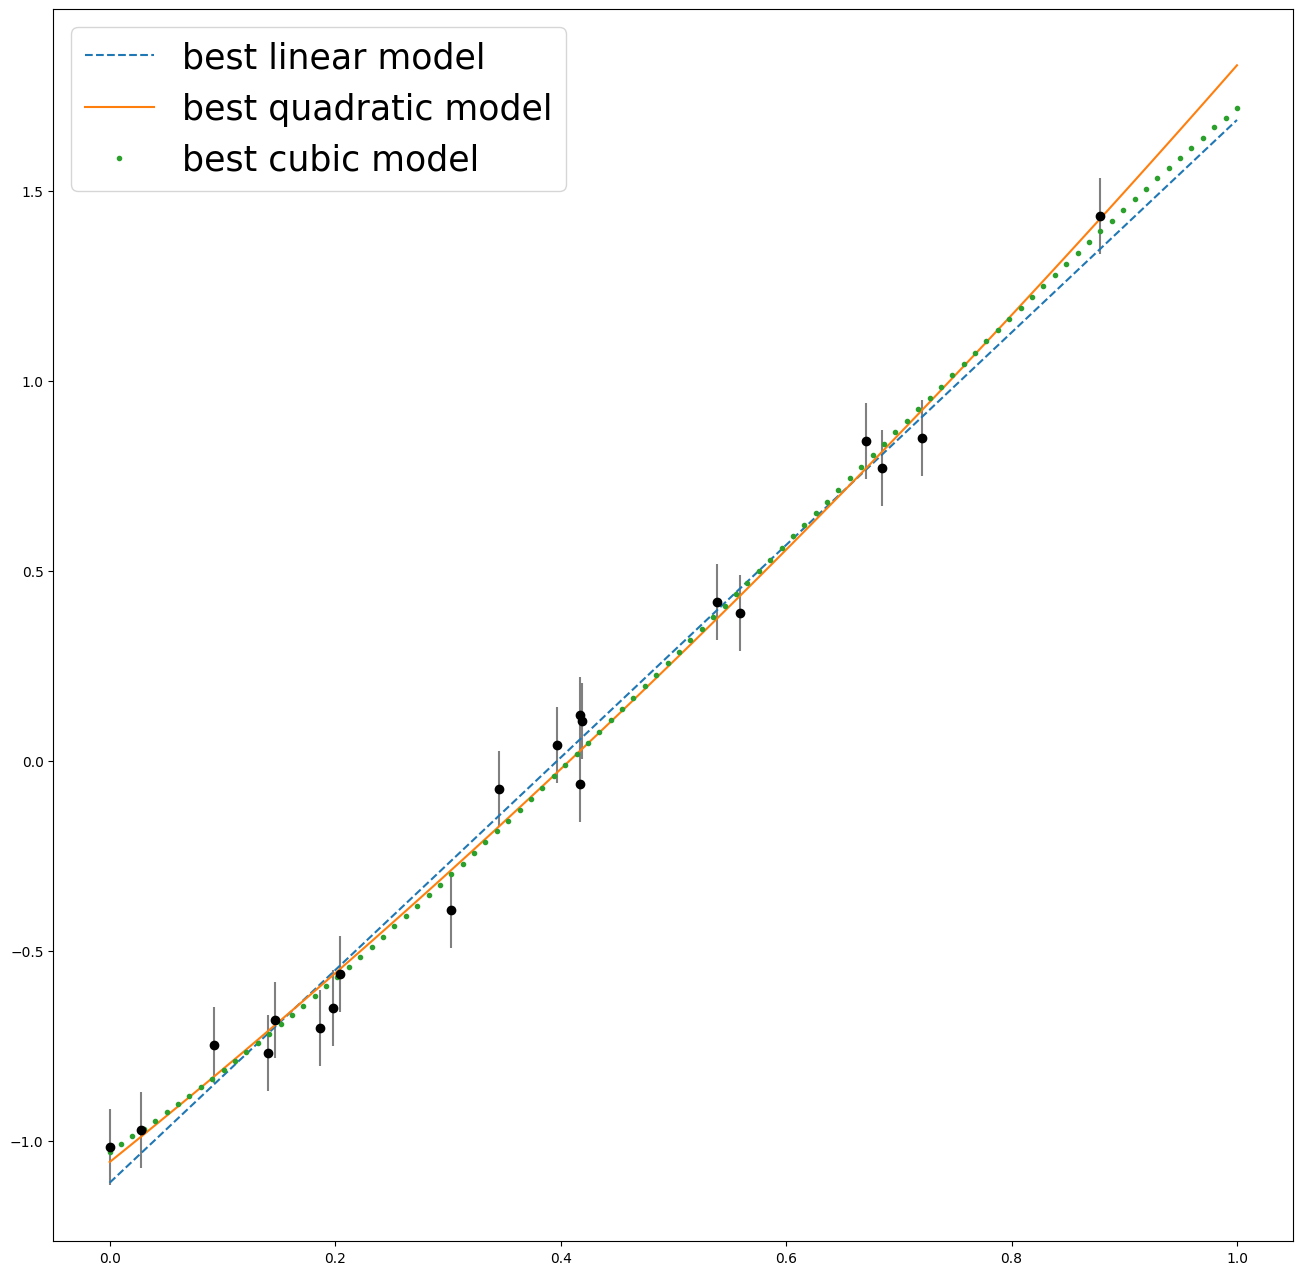

In [4]:
xfit = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(16,16))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit),'--', label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit),'.',label='best cubic model')
ax.legend(loc='best', fontsize=25)

In [5]:
def compute_chi2(degree, data=data):
    '''
    Compute the chi2 corresponding to model and fit
    '''
    x, y, sigma_y = data
    theta = best_theta(degree, data=data)
    resid = (y - polynomial_fit(theta, x)) / sigma_y
    return np.sum(resid ** 2)

def compute_dof(degree, data=data):
    '''
    Compute dof corresponding to degree
    '''
    return data.shape[1] - (degree + 1)

def chi2_likelihood(degree, data=data):
    '''
    Compute the probability(likelihood) of obtaining the chi2 at that particular fit
    '''
    chi2 = compute_chi2(degree, data)
    dof = compute_dof(degree, data)
    return s.chi2(dof).pdf(chi2)

print("chi2 likelihood")
print("- linear model:    ", chi2_likelihood(1))
print("- quadratic model: ", chi2_likelihood(2))
print("- cubic model: ", chi2_likelihood(3))

chi2 likelihood
- linear model:     0.04538379558592013
- quadratic model:  0.036608447550141865
- cubic model:  0.04215280601014605


Since the chisq likelihood is maximum for the linear model, we prefer that.

In [42]:
chi2_diff1 = compute_chi2(1) - compute_chi2(2)
chi2_diff2 = compute_chi2(1) - compute_chi2(3)

#Compute the statistical significance with respect to the null hypothesis(a linear model)
#Higher the p-value, higher the probability of obtaining the given data if the null hypothesis were true
#High cdf means that chi2 diff is lower in most of the cases, i.e. low p-value and less in favour of the null hypothesis

p_value1 = 1 - s.chi2(1).cdf(chi2_diff1)
p_value2 = 1 - s.chi2(2).cdf(chi2_diff2)
print('P-value; Quadratic=',p_value1)
print('P-value; Cubic=',p_value2)

P-value; Quadratic= 0.178132756953166
P-value; Cubic= 0.3288788441964431


The p-value is statistically significant and in favour of the null hypothesis(that the linear model works best)

In [11]:
def aic(deg,theta):
    return 2*(deg+1) - 2*logL(theta)

def bic(deg,theta):
    return (deg+1)*np.log(len(x)) - 2*logL(theta)

print('Cubic AIC=',aic(3,theta3),' BIC=',bic(3,theta3))
print('Quadratic AIC=',aic(2,theta2),' BIC=',bic(2,theta2))
print('Linear AIC=',aic(1,theta1),' BIC=',bic(1,theta1))

Cubic AIC= -38.26081851759503  BIC= -34.277889423379065
Quadratic AIC= -39.84982062400546  BIC= -36.86262380334349
Linear AIC= -40.03668681607252  BIC= -38.04522226896454


Using AIC, BIC we prefer the model with less AIC, BIC. Therefore a linear model is preferred,just like what a frequentist analysis suggests.

# P2

In [12]:
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

In [14]:
theta1=best_theta(1)
theta2=best_theta(2)

print('Quadratic AIC=',aic(2,theta2),' BIC=',bic(2,theta2))
print('Linear AIC=',aic(1,theta1),' BIC=',bic(1,theta1))

Quadratic AIC= -39.883027173007996  BIC= -36.895830352346024
Linear AIC= -40.0217340132251  BIC= -38.03026946611712


These results also suggest that a linear model is a better fit(like the frequentist comparison on JVDP's blog).

In [16]:
aic(2,theta2)-aic(1,theta1)

0.1387068402171039

In [17]:
bic(2,theta2)-bic(1,theta1)

1.1344391137710943

The strength of evidence tests indicate substantial evidence for the linear model(according to AIC) and mentionable evidence according to BIC.

# P3

Publication: [Application of the Kolmogorov-Smirnov test to CMB data:
Is the universe really weakly random?](https://arxiv.org/pdf/1105.5051.pdf)<br>
The author replicates a previous study on testing the randomness of CMB. The previous study rendered the universe weakly random with only 20% of the flucatuations explained as a random Gaussian field. This one repeats the analysis properly taking into consideration the correlations in the CMB spectrum and finds no deviation from $\Lambda$CDM Cosmology.<br>
Note that the K-S Test doesn't immediately apply to a correlated dataset so the author performs a whitening transformations so as to generate IID datasets equivalently testing the transformed datasets.<br>
CMB data is picked from WMAP and compared against $\Lambda CDM$ simulations(alongwith WMAP noise). The author finds that the CMB map is fully consistent with ΛCDM. <br>
The PSU article alerts us on the following fronts where K-S Test does not apply:
1. Multiple crossings of the EDFs
2. Model derived from the dataset
3. Multiple dimensions
In this paper, the observations and simulations are independent. Also the CDF here is 1-D - see eq 1 in the paper for clarity, that quantifies the absolute difference between theory and observation. As for the fact that there are no multiple crossings I plotted it in Desmos and verified that it is indeed the case. Thus the K-S Test has been used properly here.

# P4

For the Higgs discovery, statistical significance in terms of $\sigma s$:

In [18]:
s.norm.isf(1.7e-9)

5.911017938341624

For the LIGO Discovery:

In [19]:
s.norm.isf(2e-7)

5.068957749717791

For the neutrino-oscillations paper, the p-value is

In [22]:
1-s.chi2(67).cdf(65.2)

0.5394901931099038